# Testing the Bollinger Band Strategy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [210]:
'''Reading the file'''

df = pd.read_csv('nifty5Y.csv', delimiter =',')
#prices = pd.DataFrame

'''Converting Date column to datetime'''

df['Date'] = pd.to_datetime(df['Date'])
#train , test = prices[:-200] , prices[-200:]

In [211]:
df = df.dropna()

## Creating bollinger band variables

In [212]:
'''Middle Band = 20 day moving average
Upper Band = 20 day moving average + (20 Day standard deviation of price x 2) 
Lower Band = 20 day moving average - (20 Day standard deviation of price x 2)'''

# cAlculate the 20 day SMA
df['20 ma'] = df['Adj Close'].rolling(20).mean()

#Calcultae the 20day standard deviation
df['20 sd'] = df['Adj Close'].rolling(20).std()

#Calcultaing the upper and lower bands
df['Upper Band'] = df['20 ma'] + (df['20 sd']*2)

df['Lower Band'] = df['20 ma'] - (df['20 sd']*2)


# %B Calculation Explanation of the same is given below
'''If the closing price is equal to the upper Bollinger BandOpens 
in a new window value,Percent B would be 100 (percent).

If the closing price is above the upper Bollinger Band, Percent B would be greater than 100.

If the closing price is equal to the moving average, Percent B is 50 percent.

If the closing price is equal to the lower Bollinger Band, Percent B would be zero.

If the closing price is below the lower band, Percent B would be negative.

During up trends watch for %B to reach oversold levels for possible buying opportunities.

During down trends watch for %B to reach overbought levels for possible short sale opportunities'''

# %B = [(Price – Lower Band) / (Upper Band – Lower Band)] * 100

#df =df[20:]

df['Percent B'] = df.apply(lambda row: ((row['Adj Close'] - row['Lower Band'])/(row['Upper Band'] - row['Lower Band']))*100  , axis =1)
#df['Percent B'] = format(df['Percent B'].values, '.2f')


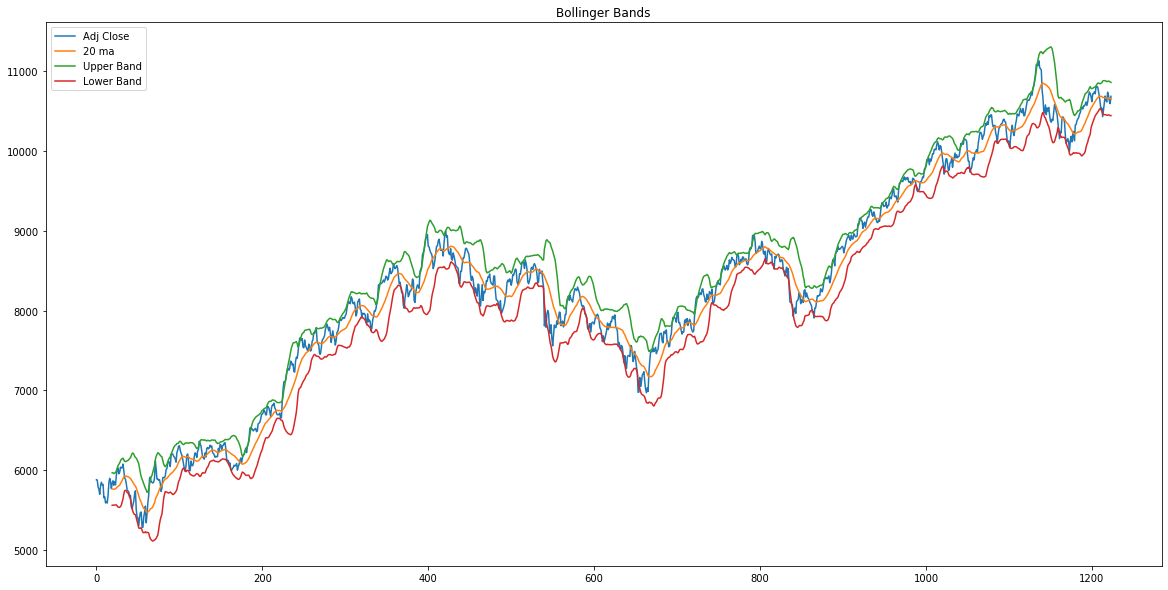

In [213]:
df.plot(y=['Adj Close','20 ma', 'Upper Band', 'Lower Band'], title='Bollinger Bands', figsize = (20,10))

In [214]:
BB_df = pd.concat([df['Adj Close'],df['Percent B']], axis = 1)

In [215]:
'''Formulating the strategy to buy when %B is gretaer than 20%'''

BB_df['Signal'] = np.where((BB_df['Percent B'] <= 60),1,0)
BB_df['position'] = BB_df['Signal'].diff()
BB_df['Percent Change'] = BB_df['Adj Close'].pct_change()
BB_df['Change'] = BB_df['Adj Close'].diff()
BB_df['Value'] = (1 + BB_df.Change).cumsum() - 1

In [219]:
BB_df

,Adj Close,Percent B,Signal,position,Percent Change,Change,Value,total
0,5881.000000,NaN,0,NaN,NaN,NaN,NaN,0.000000
1,5878.000000,NaN,0,0.0,-0.000510,-3.000000,-3.000000,0.000000
2,5788.799805,NaN,0,0.0,-0.015175,-89.200195,-91.200195,0.000000
3,5760.200195,NaN,0,0.0,-0.004941,-28.599610,-118.799805,0.000000
4,5699.100098,NaN,0,0.0,-0.010607,-61.100097,-178.899902,0.000000
5,5808.399902,NaN,0,0.0,0.019178,109.299804,-68.600098,0.000000
6,5850.049805,NaN,0,0.0,0.007171,41.649903,-25.950195,0.000000
7,5813.600098,NaN,0,0.0,-0.006231,-36.449707,-61.399902,0.000000
8,5822.250000,NaN,0,0.0,0.001488,8.649902,-51.750000,0.000000
9,5655.899902,NaN,0,0.0,-0.028571,-166.350098,-217.100098,0.000000


In [220]:
lot_size = 1
returns = 0
CountPL=False
for i, row in BB_df.iterrows():
    if CountPL==True:
        returns = returns + row['Change']*lot_size
        BB_df.loc[i,'total'] = returns
    else:
        BB_df.loc[i,'total'] = returns

    if row['Signal'] == 1:
        
        CountPL=True
    else:
        CountPL=False
    

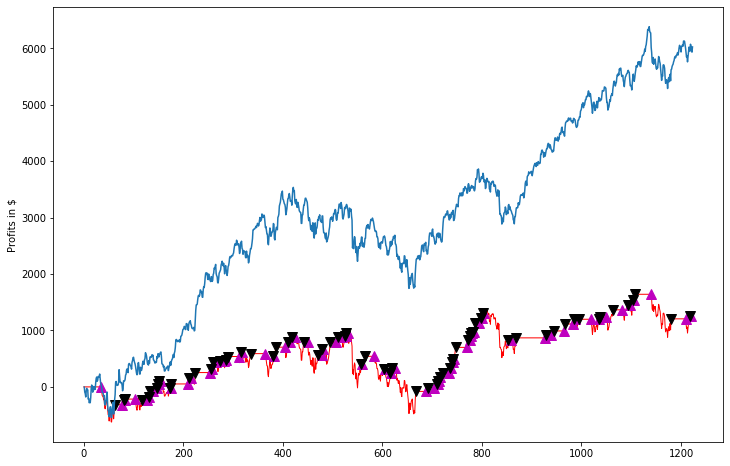

In [221]:

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111, ylabel='Profits in $')

BB_df['total'].plot(ax=ax1, color='r', lw=1.)

# Placing markers for our position entry
ax1.plot(BB_df.loc[BB_df.position == 1.0].index,
    BB_df.total[BB_df.position == 1.0],
    '^', markersize=10, color='m')

# Placing markers for our position exit

ax1.plot(BB_df.loc[BB_df.position == -1.0].index,
    BB_df.total[BB_df.position == -1.0],
    'v', markersize=10, color='k')

ax1.plot(BB_df.Value)

plt.show()